<a href="https://colab.research.google.com/github/mk7890/Machine-Learning-II/blob/main/ML2_CNN_BrainTumourMRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:
Develop a convolution neural network model to detect brain tumours of various types.

# Libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models

# Getting the Dataset

In [2]:
!kaggle datasets download -d arifmia/brain-tumor-mri-image-dataset-updated

Dataset URL: https://www.kaggle.com/datasets/arifmia/brain-tumor-mri-image-dataset-updated
License(s): apache-2.0
 84% 73.0M/86.9M [00:00<00:00, 169MB/s]
100% 86.9M/86.9M [00:00<00:00, 166MB/s]


In [3]:
!unzip brain-tumor-mri-image-dataset-updated.zip

Archive:  brain-tumor-mri-image-dataset-updated.zip
  inflating: image_dataset/Testing/glioma_tumor/image(1).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(10).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(100).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(11).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(12).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(13).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(14).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(15).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(16).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(17).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(18).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(19).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(2).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image(20).jpg  
  inflating: image_dataset/Testing/glioma_tumor/image

In [4]:
!ls image_dataset # list folders within the dataset

Testing  Training


In [5]:
!ls image_dataset/Training # list folders within the training folder

glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor


In [6]:
!ls image_dataset/Testing # list folders within the testing folder

glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor


In [7]:
# Check for the total number of files per subfolder
import os
glioma_tumor = len(os.listdir('image_dataset/Testing/glioma_tumor'))
meningioma_tumor = len(os.listdir('image_dataset/Testing/meningioma_tumor'))
no_tumor = len(os.listdir('image_dataset/Testing/no_tumor'))
pituitary_tumor = len(os.listdir('image_dataset/Testing/pituitary_tumor'))

gliomaTumor = len(os.listdir('image_dataset/Training/glioma_tumor'))
meningiomaTumor = len(os.listdir('image_dataset/Training/meningioma_tumor'))
noTumor = len(os.listdir('image_dataset/Training/no_tumor'))
pituitaryTumor = len(os.listdir('image_dataset/Training/pituitary_tumor'))

print(f"Testing Subfolders Files : Glioma tumor {glioma_tumor},  Meningioma tumor {meningioma_tumor},	No Tumor {no_tumor},  Pituitary tumor {pituitary_tumor}")
print(f"Training Subfolders Files : Glioma tumor {gliomaTumor},  Meningioma tumor {meningiomaTumor},	No Tumor {noTumor},  Pituitary tumor {pituitaryTumor}")

Testing Subfolders Files : Glioma tumor 100,  Meningioma tumor 115,	No Tumor 105,  Pituitary tumor 74
Training Subfolders Files : Glioma tumor 826,  Meningioma tumor 822,	No Tumor 395,  Pituitary tumor 827


DISTRIBUTION OF FILES IN TRAINING AND TESTING SETS

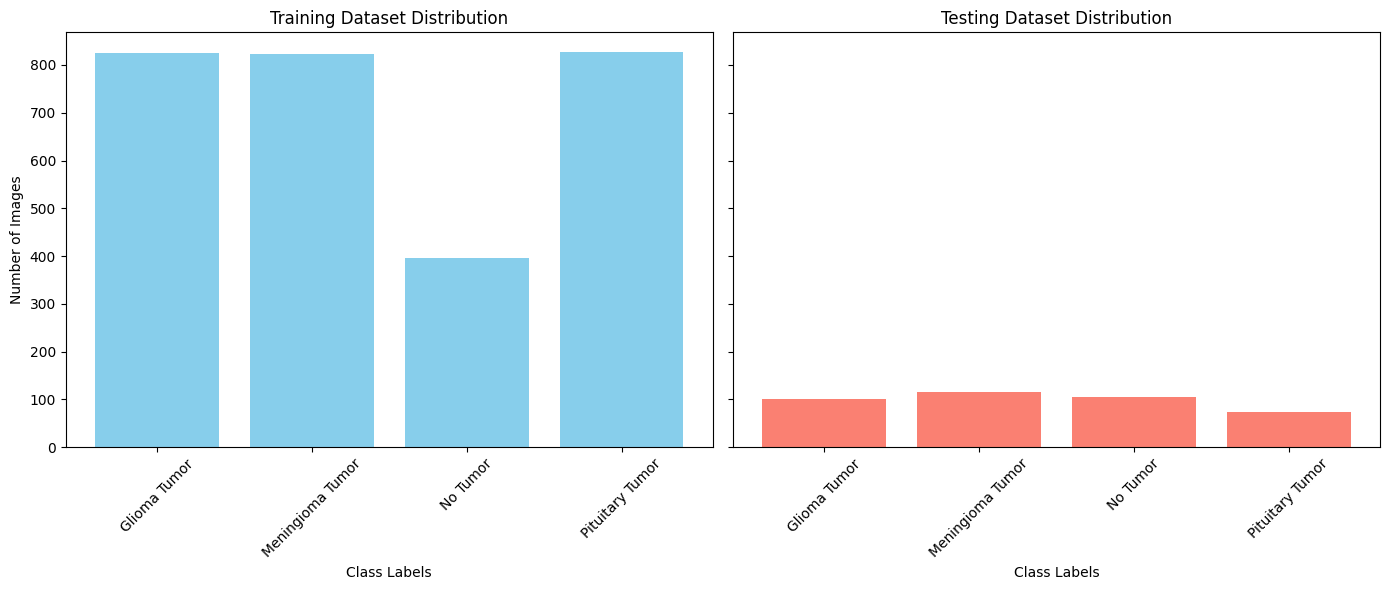

In [8]:
import matplotlib.pyplot as plt

# File counts for testing subfolders
testing_counts = {
    "Glioma Tumor": glioma_tumor,
    "Meningioma Tumor": meningioma_tumor,
    "No Tumor": no_tumor,
    "Pituitary Tumor": pituitary_tumor,
}

# File counts for training subfolders
training_counts = {
    "Glioma Tumor": gliomaTumor,
    "Meningioma Tumor": meningiomaTumor,
    "No Tumor": noTumor,
    "Pituitary Tumor": pituitaryTumor,
}

# Bar plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Training dataset distribution
axes[0].bar(training_counts.keys(), training_counts.values(), color='skyblue')
axes[0].set_title('Training Dataset Distribution')
axes[0].set_xlabel('Class Labels')
axes[0].set_ylabel('Number of Images')
axes[0].tick_params(axis='x', rotation=45)

# Testing dataset distribution
axes[1].bar(testing_counts.keys(), testing_counts.values(), color='salmon')
axes[1].set_title('Testing Dataset Distribution')
axes[1].set_xlabel('Class Labels')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [9]:
import os
import random

# Function to randomly select and display an image from the specified folder
def display_random_image(folder_path, target_class):
    # Map of target classes to subfolder names
    subfolders = {
        "glioma_tumor": "glioma_tumor",
        "meningioma_tumor": "meningioma_tumor",
        "no_tumor": "no_tumor",
        "pituitary_tumor": "pituitary_tumor"
    }

    # Ensure the target class exists in the dataset
    if target_class not in subfolders:
        print(f"Invalid target class: {target_class}. Available classes: {list(subfolders.keys())}")
        return

    # Construct the folder path
    full_path = os.path.join(folder_path, subfolders[target_class])

    # Check if the folder exists and has images
    if not os.path.exists(full_path) or len(os.listdir(full_path)) == 0:
        print(f"No images found in folder: {full_path}")
        return

    # Randomly select an image
    image_name = random.choice(os.listdir(full_path))
    image_path = os.path.join(full_path, image_name)

    # Display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')

    print(f'Image shape: {img.shape}')

    plt.title(f"Class: {target_class} | File: {image_name}")
    plt.show()


Image shape: (218, 234, 3)


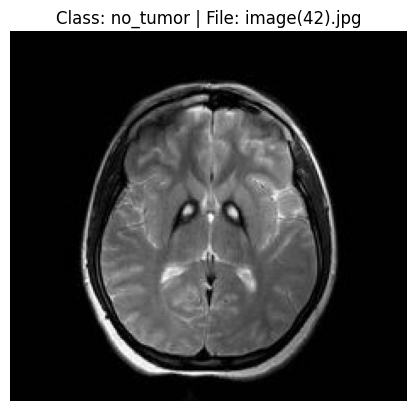

In [10]:
dataset_path = "image_dataset/Testing" # Path to the dataset
# Specify the target class (e.g., 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor')
target_class = "no_tumor"  # Change this to any target class you want
display_random_image(dataset_path, target_class) # Display a random image from the specified class and folder


Image shape: (512, 512, 3)


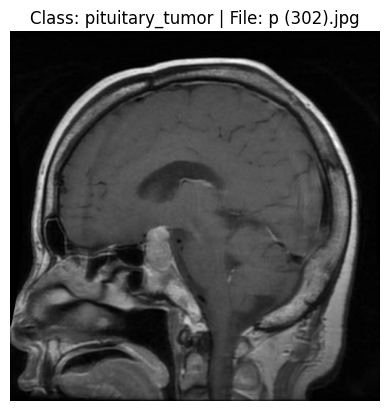

In [11]:
dataset_path = "image_dataset/Training" # Path to the dataset
# Specify the target class (e.g., 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor')
target_class = "pituitary_tumor"  # Change this to any target class you want
display_random_image(dataset_path, target_class) # Display a random image from the specified class and folder


# Splitting the Dataset into Training and Testing folders

The data (images) are already split(contained) in separate Training and Testing subfolders

In [12]:
import os

# Define the dataset paths
train_dir = "image_dataset/Training"
test_dir = "image_dataset/Testing"

# Count the number of files in each subfolder
def count_files_in_subfolders(directory):
    total_files = 0
    for subfolder in os.listdir(directory):
        subfolder_path = os.path.join(directory, subfolder)
        if os.path.isdir(subfolder_path):
            num_files = len(os.listdir(subfolder_path))
            total_files += num_files
            print(f"Subfolder '{subfolder}': {num_files} files")
    return total_files

# Count files in Training and Testing datasets
print("Training Dataset:")
total_train_files = count_files_in_subfolders(train_dir)
print(f"Total training files: {total_train_files}")

print("\nTesting Dataset:")
total_test_files = count_files_in_subfolders(test_dir)
print(f"Total testing files: {total_test_files}")


Training Dataset:
Subfolder 'glioma_tumor': 826 files
Subfolder 'meningioma_tumor': 822 files
Subfolder 'no_tumor': 395 files
Subfolder 'pituitary_tumor': 827 files
Total training files: 2870

Testing Dataset:
Subfolder 'glioma_tumor': 100 files
Subfolder 'meningioma_tumor': 115 files
Subfolder 'no_tumor': 105 files
Subfolder 'pituitary_tumor': 74 files
Total testing files: 394


# Preprocessing

## Preprocessing Training Dataset

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Data augmentation and rescaling for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Flip images horizontally
    fill_mode="nearest"  # Fill in missing pixels
)

# Generate batches of augmented data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='categorical',  # Use categorical labels
    shuffle=True
)

# Compute class weights to handle imbalance
class_counts = [827, 822, 826, 395]  # Class counts from your training set
classes = np.arange(len(class_counts))  # Classes are indexed 0, 1, 2, 3
class_weights = compute_class_weight('balanced', classes=classes, y=np.repeat(classes, class_counts))
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Computed Class Weights:", class_weights_dict)

# During model training, use `class_weight`:
# model.fit(train_generator, epochs=..., validation_data=..., class_weight=class_weights_dict)


Found 2870 images belonging to 4 classes.
Computed Class Weights: {0: 0.8675937122128174, 1: 0.8728710462287105, 2: 0.8686440677966102, 3: 1.8164556962025316}


## Original Images vs Augmented Equivalents

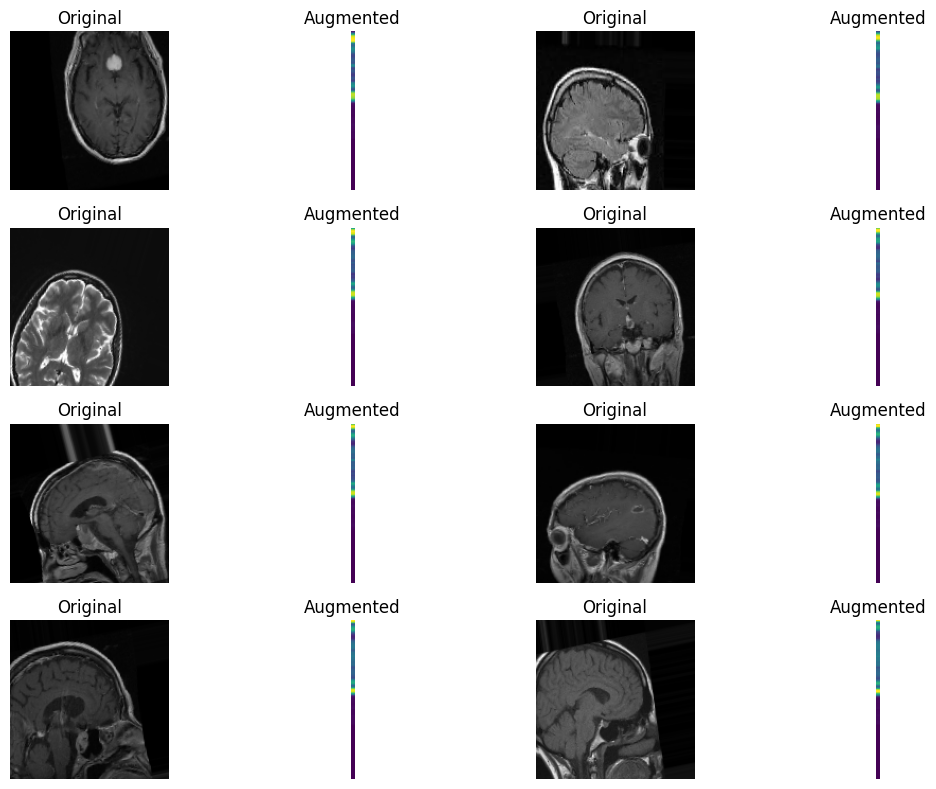

In [14]:
import matplotlib.pyplot as plt

# Function to plot original and augmented images
def plot_augmented_images(generator):
    # Fetch a batch of images and labels
    images, labels = next(generator)

    # Apply augmentation to the fetched batch
    augmented_images = train_datagen.flow(images, batch_size=images.shape[0]).__next__()[0]

    plt.figure(figsize=(12, 8))
    for i in range(8):  # Display 8 images for comparison
        # Original image
        plt.subplot(4, 4, 2 * i + 1)
        plt.imshow(images[i])
        plt.title("Original")
        plt.axis("off")

        # Augmented image
        plt.subplot(4, 4, 2 * i + 2)
        plt.imshow(augmented_images[i])
        plt.title("Augmented")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Display the images
plot_augmented_images(train_generator)


## Preprocessing Testing Dataset

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preprocessing for testing data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale, don't augment

# Generate batches of testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='categorical',  # Ensure the same class mode as training
    shuffle=False  # Do not shuffle for consistent predictions
)
# Test generator can now be used for model evaluation

Found 394 images belonging to 4 classes.


# Modeling (Building a CNN(Convolution Neural Network))

In [16]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
def build_model(input_shape=(150, 150, 3), num_classes=4):
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional block
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Regularization to prevent overfitting
    model.add(Dense(num_classes, activation='softmax'))  # Output layer

    return model

# Build the model
input_shape = (150, 150, 3)  # Input shape for images
num_classes = 4  # Number of categories
model = build_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Use Adam optimizer
              loss='categorical_crossentropy',  # Categorical loss for multi-class classification
              metrics=['accuracy'])

# Display the model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

TRAIN THE MODEL

VALIDATION SET GENERATION

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation with validation split
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # Reserve 20% of training data for validation
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [19]:
import os

print("Train Directory:", os.path.exists(train_dir))
print("Test Directory:", os.path.exists(test_dir))


Train Directory: True
Test Directory: True


In [20]:
# Install the latest version of TensorFlow:
#!pip install --upgrade tensorflow

# Train the model, disabling eager execution to force graph mode
# This can sometimes help resolve data transfer manager issues.
#import tensorflow as tf

#tf.compat.v1.disable_eager_execution()

history = model.fit(
    train_generator,
    epochs=20,  # Adjust the number of epochs as needed
    validation_data=test_generator,
    class_weight=class_weights_dict  # Handle class imbalance
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 49s 483ms/step - accuracy: 0.2842 - loss: 1.5254 - val_accuracy: 0.1904 - val_loss: 2.1246
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 53s 222ms/step - accuracy: 0.4244 - loss: 1.2833 - val_accuracy: 0.2944 - val_loss: 1.9331
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 18s 225ms/step - accuracy: 0.5132 - loss: 1.1525 - val_accuracy: 0.3173 - val_loss: 2.5519
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 228ms/step - accuracy: 0.5598 - loss: 1.0157 - val_accuracy: 0.2817 - val_loss: 3.4927
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 217ms/step - accuracy: 0.5908 - loss: 0.9698 - val_accuracy: 0.3173 - val_loss: 3.3299
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.6686 - loss: 0.8041 - val_accuracy: 0.3223 - val_loss: 3.3512
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 18s 229ms/step - accuracy: 0.6551 - loss: 0.8225 - val_accuracy: 0.3325 - val_loss: 3.3977
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.6669 - loss: 0.7823 - val_accuracy: 0.352

Best Parameters

In [26]:
# Extract the training history
training_history = history.history

# Extract validation accuracy and find the epoch with the highest value
val_accuracy = training_history['val_accuracy']
best_epoch = val_accuracy.index(max(val_accuracy)) + 1  # Epochs are 1-indexed
best_val_accuracy = max(val_accuracy)

# Extract other parameters (if available)
best_train_accuracy = training_history['accuracy'][best_epoch - 1]  # Corresponding training accuracy
best_val_loss = training_history['val_loss'][best_epoch - 1]  # Corresponding validation loss

# Print the best parameters
print(f"Best Epoch: {best_epoch}")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")
print(f"Training Accuracy at Best Epoch: {best_train_accuracy:.4f}")
print(f"Validation Loss at Best Epoch: {best_val_loss:.4f}")

Best Epoch: 9
Best Validation Accuracy: 0.3604
Training Accuracy at Best Epoch: 0.6791
Validation Loss at Best Epoch: 2.7227


## Training and Evaluation

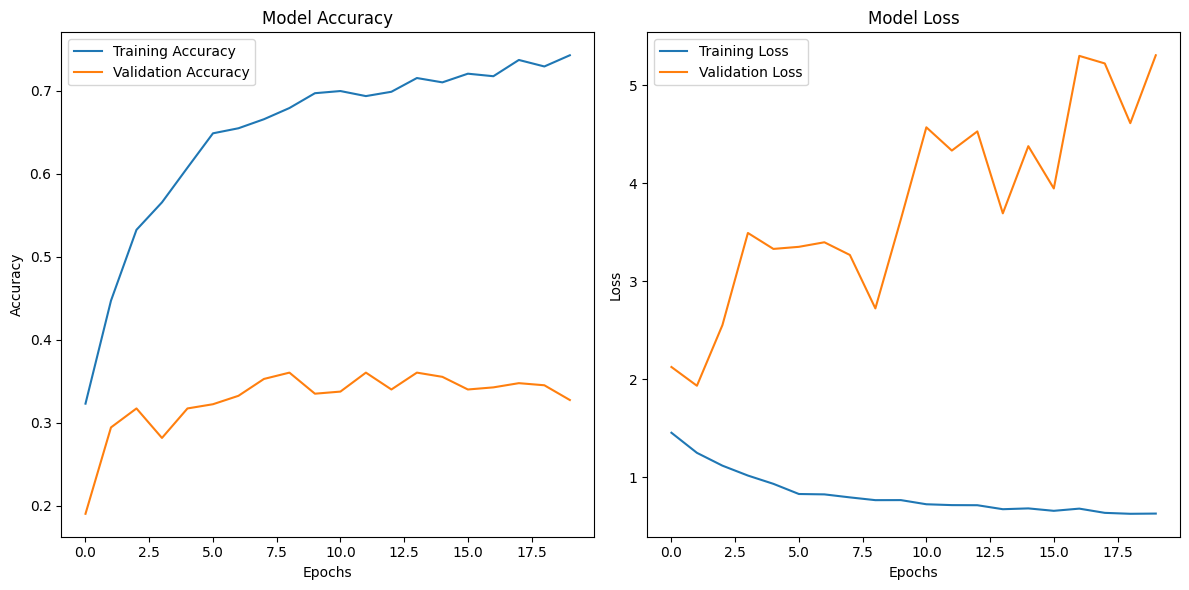

In [21]:
# Plot training history (accuracy and loss)
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

ACCURACY & LOSS EVALUATION GRAPHS

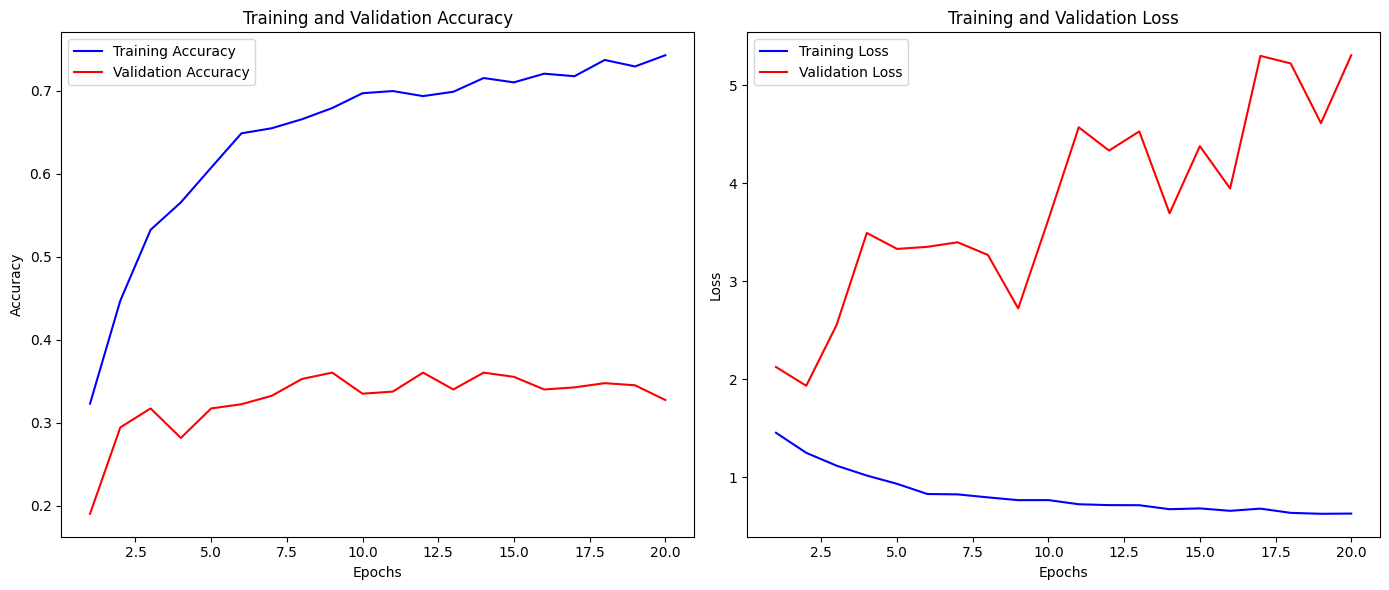

In [22]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
def plot_accuracy_and_loss(history):
    # Extract values from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function after training
plot_accuracy_and_loss(history)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.64      0.09      0.16       100
meningioma_tumor       0.24      0.09      0.13       115
        no_tumor       0.31      0.95      0.47       105
 pituitary_tumor       0.53      0.14      0.22        74

        accuracy                           0.33       394
       macro avg       0.43      0.32      0.24       394
    weighted avg       0.42      0.33      0.24       394



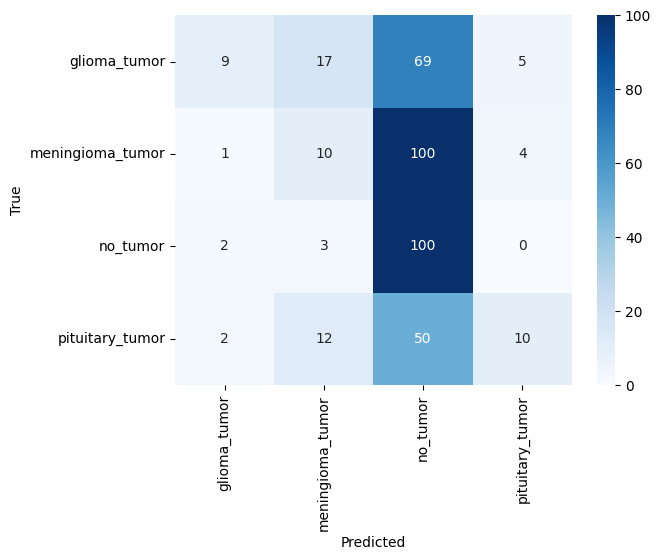

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=1)
y_true = test_generator.classes

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [24]:
# Save the model in TensorFlow's SavedModel format
#model.save('brain_tumor_model')

# OR save the model in HDF5 format (for compatibility)
model.save('brain_tumor_model.h5')

In [25]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('brain_tumor_model.h5')

# Test the loaded model
predictions = model.predict(test_generator)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step


## Export the Model for Deployment

**Cloud Deployment**

Host the application on cloud platforms like:

- Heroku: For simple deployment.
- AWS, GCP, or Azure: For more scalable deployment.
- Streamlit: For an easy-to-build interactive UI.